In [32]:
import pandas as pd

In [33]:
def codonHistogram(geneStr):
    contents = geneStr

    lenStr = 3
    lenStr = int(lenStr)

    differList = []
    subStrList = []


    for i in range(0, len(contents) - lenStr):
        subStr = contents[i: i + lenStr]

        subStrList.append(subStr)

        if subStr in differList:
            continue

        differList.append(subStr)

    dataList = sorted(differList)


    from collections import Counter
    histo = Counter(subStrList)
    
    return histo

In [34]:
def plotHistogram(histo):
    import numpy as np
    import matplotlib.pyplot as plt
    fig = plt.bar(range(len(histo)), histo.values())
    a = list(histo.keys())
    plt.xlabel('Codon')
    plt.ylabel('Frequency')
    plt.grid()
    plt.savefig('histogram.png')
    return fig

In [35]:
def baseDensity(geneStr, nWind=200):
    dA = []
    dT = []
    dC = []
    dG = []
    b=0
    for i in geneStr[0:nWind]:
            b = b+1
            dA.append(geneStr[0:b].count('a')/b)
            dT.append(geneStr[0:b].count('t')/b)
            dC.append(geneStr[0:b].count('c')/b)
            dG.append(geneStr[0:b].count('g')/b)
    return dA,dT,dC,dG

In [36]:
def plotdensity(dA,dT,dC,dG):
    import matplotlib.pyplot as ok
    # line 1 points
    x1 = np.linspace(0,1,len(dA))
    y1 = dA
    # plotting the line 1 points 
    ok.plot(x1, y1, label = "A")
    # line 2 points
    x2 = np.linspace(0,1,len(dT))
    y2 = dT
    # plotting the line 2 points 
    ok.plot(x2, y2, label = "C")
    # line 3 points
    x2 = np.linspace(0,1,len(dC))
    y2 = dC
    # plotting the line 3 points 
    ok.plot(x2, y2, label = "G")
    # line 4 points
    x2 = np.linspace(0,1,len(dG))
    y2 = dG
    # plotting the line 4 points 
    ok.plot(x2, y2, label = "T")
    ok.xlabel('Sequence Position')
    # Set the y axis label of the current axis.
    ok.ylabel('Fraction Per Window')
    # Set a title of the current axes.
    ok.title('Density of Base Pairs Through Gene Sequence')
    # show a legend on the plot
    ok.legend()
    ok.grid()
    ok.savefig('density.png')
    return ok

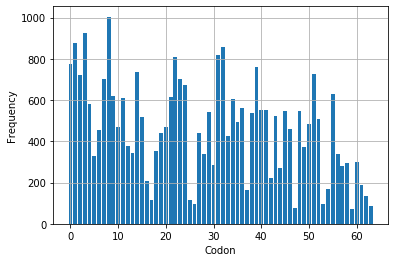

In [37]:
if __name__=="__main__":
    # Open genome
    with open('sarsCov2Sequence.txt','r') as geneFile:
        geneStr = geneFile.readline()
    # Generate codon histogram
    histo = codonHistogram(geneStr)
    # Plot histogram with nice formatting
    plotHistogram(histo)
    dA,dT,dC,dG = baseDensity(geneStr)

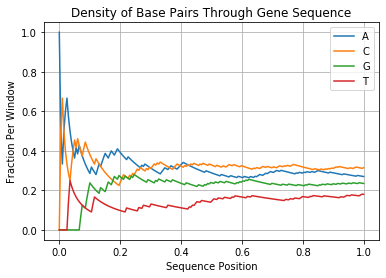

In [38]:
if __name__=="__main__":
    plotdensity(dA,dT,dC,dG)